In [36]:
import matplotlib.pyplot as plt  
from matplotlib import style  
style.use('ggplot')  
import numpy as np 
from sklearn.neighbors import DistanceMetric
import random

In [37]:
# Tomado de https://www.c-sharpcorner.com/article/understanding-k-means-clustering-the-easy-way/ 
  
#Defination of the class K_Means  
#Using this class we are implementing all the steps required  
#to be performed to generate a k-means model  
class K_Means:  
    def __init__(self, k=3, tol=0.001, max_iter=300, p=2):  
        self.k = k  
        self.tol = tol  
        self.max_iter = max_iter 
        self.p = p 
  
    #Function to fit the dummy mode on to the model  
    def fit(self, data):  
  
        self.centroids = {}  
        self.SSW = 0
  
        for i in range(self.k):
            center_random = random.randint(1, len(data)-1)
            self.centroids[i] = data[center_random]  
  
        for i in range(self.max_iter):  
            self.classifications = {}  
  
            for i in range(self.k):  
                self.classifications[i] = []  

            cov = np.cov(data.T)
            inv_covmat = np.linalg.inv(cov)
            
            for featureset in data:  
                # distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]  
                distances = [self.distance(featureset, self.centroids[centroid], self.p, inv_covmat) for centroid in self.centroids] 
                self.SSW += (np.power(distances,2)).sum()
                classification = distances.index(min(distances))  
                self.classifications[classification].append(featureset)  
  
            prev_centroids = dict(self.centroids)  
  
            for classification in self.classifications:  
                self.centroids[classification] = np.mean(self.classifications[classification],axis=0)  
  
            optimized = True  
  
            for c in self.centroids:  
                original_centroid = prev_centroids[c]  
                current_centroid = self.centroids[c]  
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:  
                    np.sum((current_centroid-original_centroid)/original_centroid*100.0)  
                    optimized = False  
  
            if optimized:  
                break  
    
    def distance(self, centroide, dato, p, S):
        if p == 0:
            x_mu = dato - centroide
            left = np.dot(x_mu, S)
            mahal = np.dot(left, x_mu.T)
            return mahal
        return (abs(dato[0]-centroide[0])**p + abs(dato[1]-centroide[1])**p)**(1/p)
  

In [38]:
#Dummy data  
X = np.random.normal( 0.5,  0.1, (1000,2))
X = np.random.normal( 50,  0.1, (1000,2))
X = np.random.normal( 800,  0.1, (1000,2))
#Lineal
# import pandas as pd
# df = pd.read_csv('weight-height.csv', nrows=1000)
# X = df[['Height', 'Weight']].to_numpy()

#iris
# from sklearn import datasets
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features.  

# blobs
# from sklearn.datasets.samples_generator import make_blobs
# X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.60, random_state=0) 

SSW para la métrica  0   283032.7371917467
SSB para la métrica  0   5.04878788990423e-06


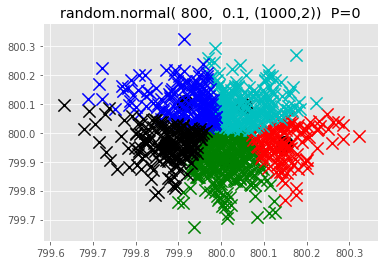

SSW para la métrica  1   631.4985482466185
SSB para la métrica  1   5.04878788990423e-06


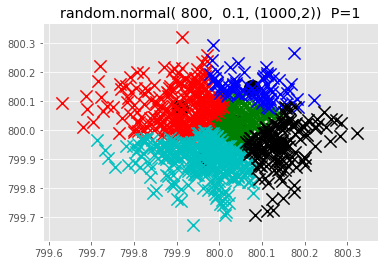

SSW para la métrica  2   436.9192790499508
SSB para la métrica  2   5.04878788990423e-06


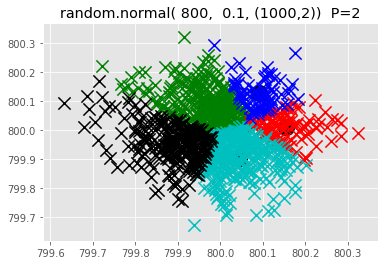

In [62]:
# p=0 p=1 p=2
k = []
media = np.mean(X,0)
dmedia = []
SSB = 0
for i in range(0, 3):
    clf = K_Means(k=5, tol=0.001, max_iter=300, p=i)
    clf.fit(X)
    #putting the centroid values on to the plot  
    for centroid in clf.centroids:
        dmedia.append(np.power(clf.distance(clf.centroids[centroid], media, i, np.cov(X.T)),2))
        plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],  
                    marker="o", color="k", s=150, linewidths=5)  
    for classification in clf.classifications: 
        color = colors[classification]  
        k.append(len(clf.classifications[classification]))
        SSB = (k[classification]*dmedia[classification]).sum()
        for featureset in clf.classifications[classification]:
            plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)  
    print('SSW para la métrica ',i,' ', clf.SSW)
    print('SSB para la métrica ',i,' ', SSB)
    plt.title(f'random.normal( 800,  0.1, (1000,2))  P={i}')
    plt.show()

# p=50
clf = K_Means(k=5, tol=0.001, max_iter=300, p=50)
clf.fit(X)



SSW para la métrica Infinita   803.9347158518435
SSB para la métrica Infinita   5.04878788990423e-06


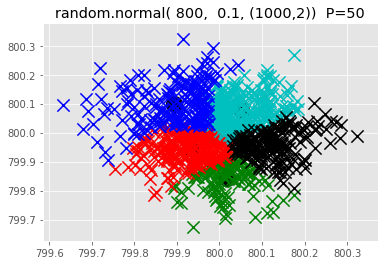

803.9347158518435


In [65]:
for centroid in clf.centroids:
    dmedia.append(np.power(clf.distance(clf.centroids[centroid], media, 50, np.cov(X.T)),2))
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],  
                marker="o", color="k", s=150, linewidths=5)
for classification in clf.classifications:  
    color = colors[classification]
    k.append(len(clf.classifications[classification]))
    SSB = (k[classification]*dmedia[classification]).sum() 
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
print('SSW para la métrica Infinita  ', clf.SSW)
print('SSB para la métrica Infinita  ', SSB)  
plt.title(f'random.normal( 800,  0.1, (1000,2))  P=50')
plt.show()
print(clf.SSW)